Width: 3000
Height: 4000
fixed Width: 640
fixed Height: 480


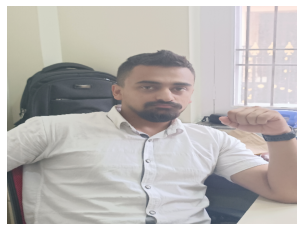

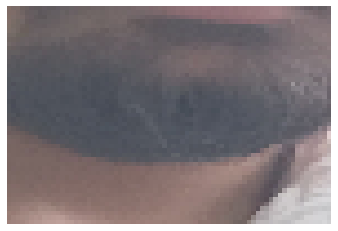

In [4]:
# using googkle media pipeline to crops to lips
import cv2
import math
import matplotlib.pyplot as plt
import mediapipe as mp
import random
import os
from IPython.display import display, Image
from PIL import Image
import numpy as np

#====================
class mpFace:
    import mediapipe as mp
    import cv2

    def __init__(self,width=640,height=480):
        self.findFace = self.mp.solutions.face_detection.FaceDetection()
        self.faceMesh = self.mp.solutions.face_mesh.FaceMesh(False,3,True,0.5,0.5)
        #(staticFrame,number of faces,True for extra iris landmarks,trackingParameter,findingParameter)
        self.width = width
        self.height = height


    def faceBox(self,frame):#face bounding box
        frameRGB = self.cv2.cvtColor(frame,self.cv2.COLOR_BGR2RGB)
        results = self.findFace.process(frameRGB)
        myFaces = []
        if results.detections != None:
            for face in results.detections:
                bBox = face.location_data.relative_bounding_box
                topLeft = (int(bBox.xmin*self.width),int(bBox.ymin*self.height))
                bottomRight = (int((bBox.xmin+bBox.width)*self.width),int((bBox.ymin+bBox.height)*self.height))
                myFaces.append((topLeft,bottomRight))
        return myFaces

    def faceLandmarks(self,frame):#Full Face Landmarks
        frameRGB = self.cv2.cvtColor(frame,self.cv2.COLOR_BGR2RGB)# Converts BGR (OpenCV default) color format to RGB format required by MediaPipe.
        results = self.faceMesh.process(frameRGB) #Processes the RGB frame using the faceMesh model to detect facial landmarks
        myFacesLandmarks=[] #Initializes an empty list to store landmarks for each detected face.
        myFaceLandmarks=[]  #Initializes an empty list to store landmarks for a single face.

        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                for lm in faceLandmarks.landmark:
                    myFaceLandmarks.append((int(lm.x*self.width),int(lm.y*self.height),int(lm.z*self.width)))

                myFacesLandmarks.append(myFaceLandmarks)
        return myFacesLandmarks

    def faceLandmarksSimplified(self,frame):#essential face landmarks(left eyebrow,righteyebrow,left eye,right eye,inner lips,outer lips,face outline,left iris and right iris)
        frameRGB = self.cv2.cvtColor(frame,self.cv2.COLOR_BGR2RGB)
        results = self.faceMesh.process(frameRGB)
        #sequenced indexes of required landmarks from original landmarks
        points = [70,63,105,66,107,55,65,52,53,46,300,293,334,296,336,285,295,282,283,276,33,246,161,160,159,158,157,173,133,155,154,153,145,144,163,7,263,466,388,387,386,385,384,398,362,382,381,380,374,373,390,249,78,191,80,81,82,13,312,311,310,415,308,324,318,402,317,14,87,178,88,95,61,185,40,39,37,0,267,269,270,409,291,375,321,405,314,17,84,181,91,146,10,338,297,332,284,251,389,356,454,323,361,288,397,365,379,378,400,377,152,148,176,149,150,136,172,58,132,93,234,127,162,21,54,103,67,109,468,469,470,471,472,473,474,475,476,477,64,4,294]
        myFaceLandmarksSimplified=[]
        myFacesLandmarksSimplified=[]
        myFaceLandmarksRearranged = [0]*len(points)
        myIndex=[]

        if results.multi_face_landmarks != None:
            for faceLandmarks in results.multi_face_landmarks:
                for lm,indx in zip(faceLandmarks.landmark,range(len(faceLandmarks.landmark))):
                    if indx in points:#only collect required landmarks
                        myFaceLandmarksSimplified.append((int(lm.x*self.width),int(lm.y*self.height),int(lm.z*self.width)))
                        myIndex.append(points.index(indx))#for rearranging the points, collect sequenced index
                    for i,indx in zip(range(len(points)),myIndex):
                        myFaceLandmarksRearranged[indx] = myFaceLandmarksSimplified[i]#rearranging according to sequenced index

                myFacesLandmarksSimplified.append(myFaceLandmarksRearranged)
        return myFacesLandmarksSimplified
    
    
#============================



# Provide the path to the input image on your computer
file_path = r'C:\Users\suraj\Downloads\IMG_20230825_141344.jpg'

# Read the image using Matplotlib
image = plt.imread(file_path)

# Display the image using Matplotlib
plt.imshow(image)


# Get width and height from the loaded photo
width = image.shape[1]
height = image.shape[0]

# Print width and height
print("Width:", width)
print("Height:", height)

# Resize the photo to a fixed size (640x480)
fixed_width = 640
fixed_height = 480
resized_image = cv2.resize(image, (fixed_width, fixed_height))

# Print width and height
print("fixed Width:", fixed_width)
print("fixed Height:", fixed_height)

# Display the resized photo using Matplotlib
plt.imshow(resized_image)


plt.axis('off')  # Turn off axis
plt.show()

#=================================

radius = 2
#red = (0,0,255)
green = (0,255,0)
blue = (255,0,0)
yellow = (0,255,255)


# Define transparent colors
transparent_red = (0, 0, 255, 0)    # Transparent red
transparent_green = (0, 255, 0, 0)  # Transparent green

#For connecting range of dots
def connectPoints(indx1,indx2):
    for i in range(indx1,indx2):
        if i==(indx2-1):
            cv2.line(frame,(face[i][0],face[i][1]),(face[indx1][0],face[indx1][1]),transparent_green,1)
            break
        cv2.line(frame,(face[i][0],face[i][1]),(face[i+1][0],face[i+1][1]),transparent_green,1)

#Finding length between two points
def findRadius(pt1,pt2):
    x1,y1 = (pt1[0],pt1[1])
    x2,y2 = (pt2[0],pt2[1])
    radius = math.sqrt(((y2-y1)*(y2-y1))+((x2-x1)*(x2-x1)))
    return radius

#boundary box code
def findBoundingBox(lip_landmarks, margin=20):
    min_x = min(lip_landmarks, key=lambda x: x[0])[0] - margin
    max_x = max(lip_landmarks, key=lambda x: x[0])[0] + margin
    min_y = min(lip_landmarks, key=lambda x: x[1])[1] - margin
    max_y = max(lip_landmarks, key=lambda x: x[1])[1] + margin
    return (min_x, min_y, max_x, max_y)


# Load an image from the filesystem



image_path = r'C:\Users\suraj\Downloads\IMG_20230825_141344.jpg'
original_frame = cv2.imread(image_path)

# Resize the image to a fixed size (640x480)
fixed_width = 640
fixed_height = 480
frame = cv2.resize(original_frame, (fixed_width, fixed_height))


# Perform face detection and lip landmarks
faceLm = mpFace()
faces = faceLm.faceLandmarksSimplified(frame)

for face in faces:
    outer_lip_landmarks = face[72:92]
    outer_lip_box = findBoundingBox(outer_lip_landmarks, margin=10)

    # Draw bounding boxes around outer lips with transparent blue color
    #transparent_blue_box = (0, 0, 255, 100)  # Transparent blue with alpha value (100)
    #cv2.rectangle(frame, (outer_lip_box[0], outer_lip_box[1]), (outer_lip_box[2], outer_lip_box[3]), transparent_blue_box, 2)

    # Crop the outer lip region
    outer_lip_cropped = frame[outer_lip_box[1]:outer_lip_box[3], outer_lip_box[0]:outer_lip_box[2]]

    # Display the cropped region using Matplotlib
    plt.imshow(cv2.cvtColor(outer_lip_cropped, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
        
# Display the original image with transparent blue bounding boxes
#cv2.imshow('outer lip detection', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()




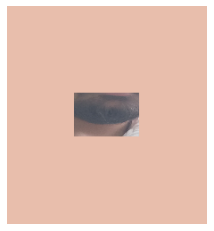

In [5]:
from PIL import Image
import numpy as np

# Convert the OpenCV image to a PIL Image
pil_image = Image.fromarray(cv2.cvtColor(outer_lip_cropped, cv2.COLOR_BGR2RGB))

# Desired dimensions for the padded image
new_width = 224  # Choose the desired new width
new_height = 244  # Choose the desired new height

# Create a new blank image with black background
padded_image = Image.new("RGB", (new_width, new_height), (232, 190, 172))

# Calculate the position to paste the original image
paste_x = (new_width - pil_image.width) // 2
paste_y = (new_height - pil_image.height) // 2

# Paste the original image onto the padded image
padded_image.paste(pil_image, (paste_x, paste_y))


# Save the padded image
#padded_image.save(r"C:\Users\suraj\Desktop\new dataset\0001padding.jpg")  # Replace with your desired output path


outer_lip_cropped = padded_image

# Display the padded image using Matplotlib
plt.imshow(outer_lip_cropped)
plt.axis('off')
plt.show()



# combined code 